In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Jefferson_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Jefferson"]
Jefferson_Cpx['Sample_ID_Cpx']="Jefferson"

C:\Users\penny\AppData\Local\Temp\ipykernel_25788\3297680813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jefferson_Cpx['Sample_ID_Cpx']="Jefferson"


In [3]:
WangCopy=Jefferson_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Jefferson_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)
Combo_Cpx['Sample_ID_Cpx']="Jeff"

In [4]:
len(WangCopy)

35

## Choose Crustal density

In [5]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


c:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


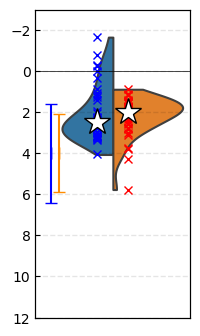

In [15]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Jefferson', 'Jefferson', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=[ "Jeff"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jeff")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jeff")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jeff")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jeff")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jeff")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jeff")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jefferson domefield")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jefferson domefield")],  
         'xb')

ax1.plot(1.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jefferson domefield")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jefferson domefield")],  
         'xr')

ax1.plot(0.9,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jefferson domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jefferson domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
ax1.errorbar(-0.4, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.35, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')


fig.savefig('Jefferson_Cpx.png', dpi=200)

In [7]:
np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jeff")])

2.4777974126113733

In [8]:
np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Jeff")])

1.974848258706468

In [9]:
Cpx_compnts=pt.calculate_clinopyroxene_components(cpx_comps=Jefferson_Cpx)

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\core.py:1561: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cpx_calc.loc[(AlVI_minus_Na<0), 'Jd']=cpx_calc['Al_VI_cat_6ox']


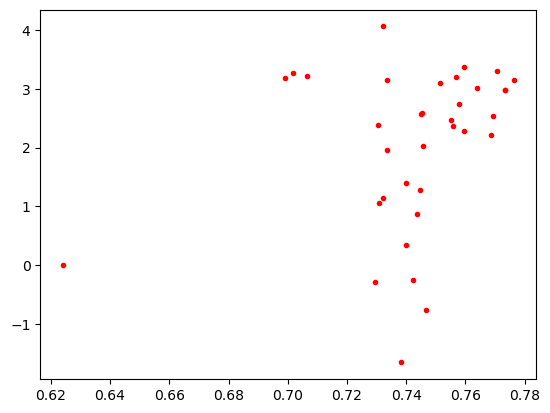

In [10]:
plt.plot(Cpx_compnts['Mgno_Cpx'], WangCopy['P_Wang21_eq1'], '.r')

## Opx - Cpx Barometry

In [11]:
Jefferson_read_Cpx_Opx=pt.import_excel(r'../../Stitching_Mineral_Data/Jefferson.xlsx', sheet_name='Cpx_Opx_Pairs')
Jefferson_Input_Cpx_Opx=Jefferson_read_Cpx_Opx['my_input']
Jefferson_Cpx_pairs=Jefferson_read_Cpx_Opx['Cpxs']
Jefferson_Opx_pairs=Jefferson_read_Cpx_Opx['Opxs']
Jefferson_Cpx_pairs['Sample_ID_Cpx']=Jefferson_Input_Cpx_Opx['Formation']

# Same filters as used for Cpx. 
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    Jefferson_cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Jefferson_Cpx_pairs)
    Jefferson_opx_comps=pt.calculate_orthopyroxene_components(opx_comps=Jefferson_Opx_pairs)
    
    Cat_Sum_Filt_cpx=(Jefferson_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    Cat_Sum_Filt_opx=(Jefferson_cpx_comps['Cation_Sum_Cpx'].between(3.95, 4.05))
    
    Ca_Filt_Opx=Jefferson_opx_comps['Ca_CaMgFe'].between(-0.2, 0.06)
    Ca_Filt_Cpx=Jefferson_cpx_comps['Ca_CaMgFe'].between(0.2, 0.5)
    HighMgno=Jefferson_cpx_comps['Mgno_Cpx']>0.68
    
    Jefferson_Cpx_pairs_Filt=Jefferson_Cpx_pairs.loc[HighMgno&Ca_Filt_Opx&Ca_Filt_Cpx&Cat_Sum_Filt_cpx&Cat_Sum_Filt_opx].reset_index(drop=True)
    Jefferson_Opx_pairs_Filt=Jefferson_Opx_pairs.loc[HighMgno&Ca_Filt_Opx&Ca_Filt_Cpx&Cat_Sum_Filt_cpx&Cat_Sum_Filt_opx].reset_index(drop=True)
    Jefferson_All_Filt=Jefferson_Input_Cpx_Opx.loc[HighMgno&Ca_Filt_Opx&Ca_Filt_Cpx&Cat_Sum_Filt_cpx&Cat_Sum_Filt_opx].reset_index(drop=True)
    



#More than Mg#75
Jefferson_cpx_opx_36_39=pt.calculate_cpx_opx_press_temp(cpx_comps=Jefferson_Cpx_pairs_Filt, 
                                                   opx_comps=Jefferson_Opx_pairs_Filt,
                                                         eq_tests=True,
                                                   equationP="P_Put2008_eq39",
                                                  equationT="T_Put2008_eq36")

Jefferson_cpx_opx_36_39['Preferred_P']=Jefferson_cpx_opx_36_39.P_kbar_calc
Jefferson_cpx_opx_36_39['Model']="36-39"

Jefferson_cpx_opx_37_39=pt.calculate_cpx_opx_press_temp(cpx_comps=Jefferson_Cpx_pairs_Filt, 
                                                   opx_comps=Jefferson_Opx_pairs_Filt,
                                                         eq_tests=True,
                                                   equationP="P_Put2008_eq39",
                                                  equationT="T_Put2008_eq37")

Jefferson_cpx_opx_37_39['Preferred_P']=Jefferson_cpx_opx_37_39.P_kbar_calc
Jefferson_cpx_opx_37_39['Model']="37-39"
Jefferson_cpx_opx_37_39_reas=Jefferson_cpx_opx_37_39.P_kbar_calc.between(-20, 20)
Jefferson_cpx_opx_36_39_reas=Jefferson_cpx_opx_36_39.P_kbar_calc.between(-20, 20)

Jefferson_cpx_opx_combo=pd.concat([Jefferson_cpx_opx_37_39.loc[Jefferson_cpx_opx_37_39_reas&Jefferson_cpx_opx_36_39_reas],
                                   Jefferson_cpx_opx_36_39.loc[Jefferson_cpx_opx_37_39_reas&Jefferson_cpx_opx_36_39_reas]], axis=0)
Jefferson_cpx_opx_combo['Sample_ID_Cpx']="Jeff"

In [ ]:
len(Jefferson_Cpx_pairs)

25

In [ ]:
sum(Jefferson_cpx_opx_37_39_reas)

23

In [ ]:
sum(Jefferson_cpx_opx_36_39_reas)

23

In [ ]:
np.shape(Jefferson_cpx_opx_combo)

(46, 100)

(0.0, 15.0)

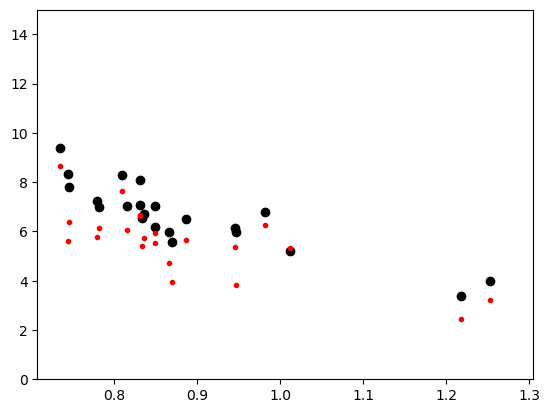

In [ ]:
plt.plot(Jefferson_cpx_opx_37_39['Kd_Fe_Mg_Cpx_Opx'], Jefferson_cpx_opx_37_39.P_kbar_calc, 'ok')
plt.plot(Jefferson_cpx_opx_36_39['Kd_Fe_Mg_Cpx_Opx'], Jefferson_cpx_opx_36_39.P_kbar_calc, '.r')
plt.ylim([0, 15])

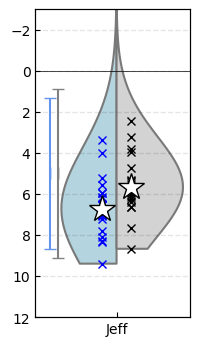

In [18]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

# ticks = [40.540139,41.3099, 41.6108, 42.9446, 43.7221, 44.103449, 44.6743, 45.3736, 46.1914, 46.8523, 48.1119, 48.7767]
# labels = ['Jefferson', 'Jefferson', 'Med Lake', 'Crater Lake', 'Newberry', '3 Sisters', 'Mt. Jeff', 'Mt. Hood', 'MSH', 'Rainier', 'Glac. Pk.', 'Mt. Baker']
# ax2.set_xticks(ticks, minor=False)
# ax2.set_xticklabels(labels, fontdict=None, minor=False, rotation=90)
#ax1.set_xlim([40, 49])
volc_order=[ "Jeff"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Jefferson_cpx_opx_combo, split=True, ax=ax1, width=0.9, order=volc_order, 
               stick=True, palette=['lightblue', 'lightgrey'])

ax1.plot(-0.1+0*Jefferson_cpx_opx_combo['Preferred_P'].loc[(Jefferson_cpx_opx_combo['Model']=="37-39")
                                        &(Jefferson_cpx_opx_combo["Sample_ID_Cpx"]=="Jeff")],
      Jefferson_cpx_opx_combo['Preferred_P'].loc[(Jefferson_cpx_opx_combo['Model']=="37-39")
                                        &(Jefferson_cpx_opx_combo["Sample_ID_Cpx"]=="Jeff")],  
         'xb')

ax1.plot(0.1+0*Jefferson_cpx_opx_combo['Preferred_P'].loc[(Jefferson_cpx_opx_combo['Model']=="36-39")
                                        &(Jefferson_cpx_opx_combo["Sample_ID_Cpx"]=="Jeff")],
      Jefferson_cpx_opx_combo['Preferred_P'].loc[(Jefferson_cpx_opx_combo['Model']=="36-39")
                                        &(Jefferson_cpx_opx_combo["Sample_ID_Cpx"]=="Jeff")],  
         'x', mec='k')

ax1.plot(-0.1,
      np.nanmedian(Jefferson_cpx_opx_combo['Preferred_P'].loc[(Jefferson_cpx_opx_combo['Model']=="37-39")
                                        &(Jefferson_cpx_opx_combo["Sample_ID_Cpx"]=="Jeff")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Jefferson_cpx_opx_combo['Preferred_P'].loc[(Jefferson_cpx_opx_combo['Model']=="36-39")
                                        &(Jefferson_cpx_opx_combo["Sample_ID_Cpx"]=="Jeff")]),  
         '*k', mfc='w', ms=20)

ax1.legend()

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.55, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.errorbar(-0.45, 5, xerr=0, yerr=3.69,  ecolor='cornflowerblue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.4, 5, xerr=0, yerr=4.12, ecolor='grey', elinewidth=1.5, fmt='none', capsize=4, mec='k')

fig.savefig('Jefferson_Cpx_Opx.png', dpi=200)

In [ ]:
print(np.nanmedian(Jefferson_cpx_opx_combo['Preferred_P'].loc[(Jefferson_cpx_opx_combo['Model']=="37-39")
                                        &(Jefferson_cpx_opx_combo["Sample_ID_Cpx"]=="Jeff")]))

6.721425695093178


In [ ]:
print(np.nanmedian(Jefferson_cpx_opx_combo['Preferred_P'].loc[(Jefferson_cpx_opx_combo['Model']=="36-39")
                                        &(Jefferson_cpx_opx_combo["Sample_ID_Cpx"]=="Jeff")]))

5.653119752898307


## NO LPS

## Amp

C:\Users\penny\AppData\Local\Temp\ipykernel_25788\3544960376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jefferson_Amp['Sample_ID_Amp']="Jefferson"
C:\Users\penny\AppData\Local\Temp\ipykernel_25788\3544960376.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jefferson_Amp_Filt['Sample_ID_Amp']="Jefferson"
C:\Users\penny\AppData\Local\Temp\ipykernel_25788\3544960376.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

247
247


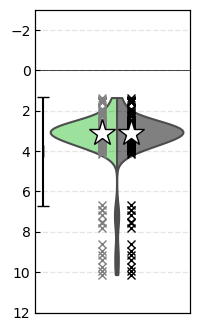

In [21]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
Jefferson_Amp=All_Amp.loc[All_Amp['Volcano']=="Jefferson"]
Jefferson_Amp['Sample_ID_Amp']="Jefferson"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
Jefferson_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="Jefferson"]
Jefferson_Amp_Filt['Sample_ID_Amp']="Jefferson"
Jefferson_Amp['Class']='Unfilt'
Jefferson_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([Jefferson_Amp_Filt, Jefferson_Amp], axis=0)

print(sum(Jefferson_Amp['P_kbar_calc']>-10))
print(sum(Jefferson_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,3.93), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=Jefferson_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*Jefferson_Amp_Filt['P_Ridolfi21'],
  Jefferson_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*Jefferson_Amp['P_Ridolfi21'],
  Jefferson_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(Jefferson_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(Jefferson_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.55, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.errorbar(-0.5, 4, xerr=0, yerr=2.7,  ecolor='black', elinewidth=1.5, ms=0, capsize=4, mec='k')



fig.savefig('Jefferson_Amp.png', dpi=200)

In [ ]:
np.nanmedian(Jefferson_Amp_Filt['P_Ridolfi21'])

3.0777624112497204

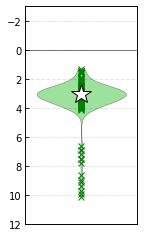

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()


ax = sns.violinplot(y=Jefferson_Amp['P_Ridolfi21'],
                inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)


ax1.plot(0*Jefferson_Amp['P_Ridolfi21'],
  Jefferson_Amp['P_Ridolfi21'],
         'x', mec='green')

ax1.plot(0,
  np.nanmedian(Jefferson_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Jefferson_Amp.png', dpi=200)

## Raw template for geophysics and Exp Pet

In [ ]:
## Same for amphibole

Jefferson_read_Amp=pt.import_excel('Jefferson.xlsx', sheet_name='Amp_All')
Jefferson_Input_Amp=Jefferson_read_Amp['my_input']
Jefferson_Amp=Jefferson_read_Amp['Amps']
Jefferson_Amp['Sample_ID_Amp']="Jeff"
Jefferson_Amp_copy=Jefferson_Amp.copy()
Jefferson_Amp_comps=pt.get_amp_sites_from_input(amp_comps=Jefferson_Amp)
# Are a few outside 3.95 to 4.05 Cat sums, CaCaMgFe lies 0.3 - 0.55
Jefferson_Amp_filt1=Jefferson_Amp.loc[( (Jefferson_Amp_comps['cation_sum_All'].between(15, 16)) )]
Jefferson_Amp_class=pt.classify_phases(df=Jefferson_Amp_filt1, return_end_members=True,
                        str_to_drop='_Amp')
print(Jefferson_Amp_class['Phase_Min_Group_ML'].unique())
Jefferson_Amp_filt=Jefferson_Amp_filt1.loc[Jefferson_Amp_class['Phase_Min_Group_ML']=="Amp"].reset_index(drop=True)
Jefferson_Amp_Press_NoFilter=pt.calculate_amp_only_press(amp_comps=Jefferson_Amp_filt, 
                        Ridolfi_Filter=False, equationP="P_Ridolfi2021")
Jefferson_Amp_Press_Filter=pt.calculate_amp_only_press(amp_comps=Jefferson_Amp_filt, 
                        Ridolfi_Filter=True, equationP="P_Ridolfi2021")

Amp_in_Filter=Jefferson_Input_Amp.loc[( (Jefferson_Amp_comps['cation_sum_All'].between(15, 16)) )
                                      &
                                      (Jefferson_Amp_class['Phase_Min_Group_ML']=="Amp")].reset_index(drop=True)
                                      

C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


['Amp' 'Px' 'Not Classified - Total>110']


In [ ]:
len(Jefferson_Amp_Press_NoFilter)

298

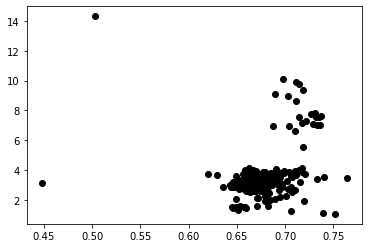

In [ ]:
plt.plot(
         (Jefferson_Amp_filt['MgO_Amp']/40.3044)/(Jefferson_Amp_filt['MgO_Amp']/40.3044+Jefferson_Amp_filt['FeOt_Amp']/71.844),
    Jefferson_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
Amp_Chem=pt.calculate_amp_only_melt_comps(amp_comps=Jefferson_Amp_filt)

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:229: UserWarning: You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)
  w.warn('You must enter a value for T in Kelvin to get results from equation3 and 5 from Zhang, and SiO2 from Putrka (2016)')


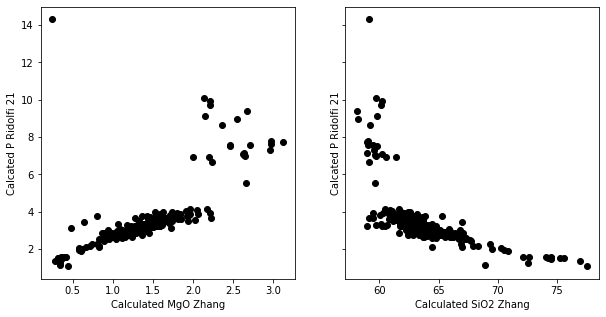

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(
         Amp_Chem['MgO_Eq9_Zhang17'],
    Jefferson_Amp_Press_NoFilter['P_kbar_calc'], 'ok')
ax1.set_xlabel('Calculated MgO Zhang')
ax1.set_ylabel('Calcated P Ridolfi 21')

ax2.set_xlabel('Calculated SiO2 Zhang')
ax2.set_ylabel('Calcated P Ridolfi 21')

ax2.plot(
         Amp_Chem['SiO2_Eq1_Zhang17'],
    Jefferson_Amp_Press_NoFilter['P_kbar_calc'], 'ok')

In [ ]:
#None Filtered
Jefferson_Amp_Press_All=Jefferson_Amp_Press_NoFilter.copy()
Jefferson_Amp_Press_All['Preferred_P']=Jefferson_Amp_Press_All['P_kbar_calc']
Jefferson_Amp_Press_All['Model']="Ridolfi not filtered"
Jefferson_Amp_Press_All['Sample_ID_Amp']="Jefferson domefield"

Jefferson_Amp_Press_Filt=Jefferson_Amp_Press_Filter.copy()
Jefferson_Amp_Press_Filt['Preferred_P']=Jefferson_Amp_Press_Filt['P_kbar_calc']
Jefferson_Amp_Press_Filt['Model']="Ridolfi filtered"
Jefferson_Amp_Press_Filt['Sample_ID_Amp']="Jefferson domefield"

Combo_Amp=pd.concat([Jefferson_Amp_Press_All, Jefferson_Amp_Press_Filt], axis=0)

In [ ]:
Combo_Amp.to_pickle("Amp_Jefferson.pkl")

In [ ]:
Jefferson_Amp_Press_All['Sample_ID_Amp']

0      Jefferson domefield
1      Jefferson domefield
2      Jefferson domefield
3      Jefferson domefield
4      Jefferson domefield
              ...         
293    Jefferson domefield
294    Jefferson domefield
295    Jefferson domefield
296    Jefferson domefield
297    Jefferson domefield
Name: Sample_ID_Amp, Length: 298, dtype: object

NameError: name 'Combo_Amp' is not defined

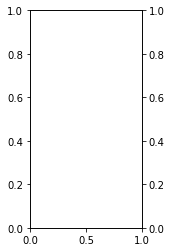

In [ ]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["Jeff", "Jefferson domefield"]
sns.violinplot(x="Sample_ID_Amp", y="Preferred_P",  cut=0, 
               linewidth=1,hue="Model", inner=None,
            data=Combo_Amp, split=True, ax=ax1, width=0.9, order=volc_order, stick=True
              , palette=['lightgreen', 'grey'])

# ax1.plot(-0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Jeff")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Jeff")],  
#          'xb')

# ax1.plot(0.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Jeff")],
#       Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Jeff")],  
#          'xr')

# ax1.plot(-0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Jeff")]),  
#          '*k', mfc='w', ms=20)

# ax1.plot(0.1,
#       np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
#                                         &(Combo_Amp["Sample_ID_Cpx"]=="Jeff")]),  
#          '*k', mfc='w', ms=20)

ax1.plot(0.9+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Jefferson domefield")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Jefferson domefield")],  
         'x', mec='green')

ax1.plot(1.1+0*Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Jefferson domefield")],
      Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Jefferson domefield")],  
         'x', mec='k')

ax1.plot(0.9,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi not filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Jefferson domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Jefferson domefield")]),  
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([0.5, 1.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
#ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Jefferson_Amp.png', dpi=200, bbox_inches='tight')



In [ ]:
Amp_in_Filter.loc[Jefferson_Amp_Press_NoFilter['P_kbar_calc']>100]

,Volcano,Reference,SampleID,Formation,Location,SiO2_Amp,Al2O3_Amp,TiO2_Amp,FeOt_Amp,MgO_Amp,CaO_Amp,MnO_Amp,Na2O_Amp,K2O_Amp,OH_Amp,Cr2O3_Amp,Cl_Amp,Total,test_total


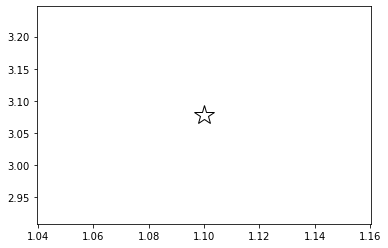

In [ ]:
plt.plot(1.1,
      np.nanmedian(Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Jefferson domefield")]),  
         '*k', mfc='w', ms=20)

In [ ]:
Combo_Amp["Sample_ID_Amp"]

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
             ...       
537    Lassen domefield
538    Lassen domefield
539    Lassen domefield
540    Lassen domefield
541    Lassen domefield
Name: Sample_ID_Amp, Length: 2168, dtype: object

In [ ]:
Combo_Amp['Preferred_P'].loc[(Combo_Amp['Model']=="Ridolfi filtered")
                                        &(Combo_Amp["Sample_ID_Amp"]=="Jefferson domefield")]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
537   NaN
538   NaN
539   NaN
540   NaN
541   NaN
Name: Preferred_P, Length: 542, dtype: float64